# Additional methods

```{note}
You can try this notebook in you browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/martinfleis/clustergram/HEAD?filepath=doc%2Fnotebooks%2Fevaluation.ipynb)
```

This notebooks provides an overview of built-in clustering performance evaluation, ways of accessing individual labels resulting from clustering and saving the object to disk.

## Clustering performance evaluation

Clustergam includes handy wrappers around a selection of clustering performance metrics offered by
`scikit-learn`. Data which were originally computed on GPU are converted to numpy on the fly.

Let's load the data and fit clustergram on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [1]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

seaborn.set(style='whitegrid')

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

cgram = Clustergram(range(1, 12), verbose=False)
cgram.fit(data)

/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/martin/mambaforge/envs/cgram/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

### Silhouette score

Compute the mean Silhouette Coefficient of all samples. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) for details. 

In [2]:
cgram.silhouette_score()

2     0.531540
3     0.447219
4     0.400778
5     0.378238
6     0.372722
7     0.333516
8     0.299830
9     0.287977
10    0.284038
11    0.275403
Name: silhouette_score, dtype: float64

Once computed, resulting Series is available as `cgram.silhouette`. Calling the original method will recompute the score.

<AxesSubplot: >

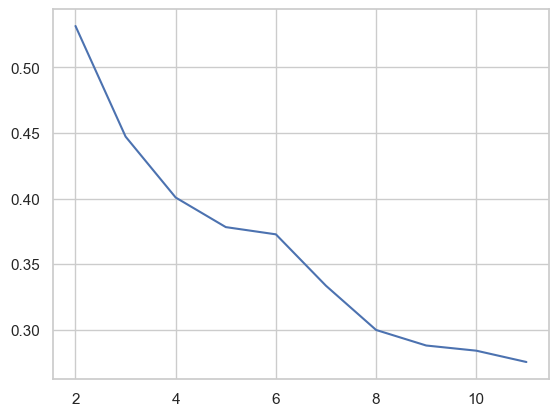

In [3]:
cgram.silhouette.plot()

### Calinski and Harabasz score

Compute the Calinski and Harabasz score, also known as the Variance Ratio Criterion. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) for details.

In [4]:
cgram.calinski_harabasz_score()

2     482.191469
3     441.677075
4     400.184568
5     411.258719
6     382.463837
7     352.276772
8     333.727775
9     316.530219
10    300.691368
11    286.624319
Name: calinski_harabasz_score, dtype: float64

Once computed, resulting Series is available as `cgram.calinski_harabasz`. Calling the original method will recompute the score.

<AxesSubplot: >

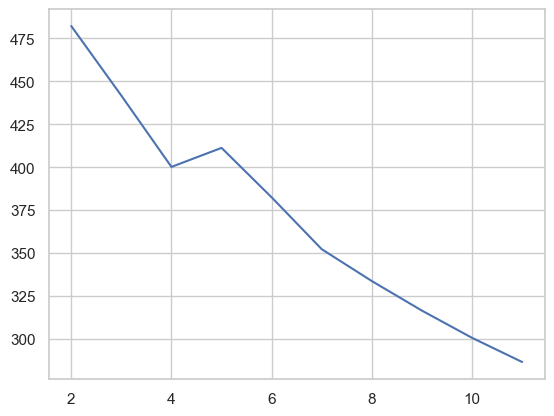

In [5]:
cgram.calinski_harabasz.plot()

### Davies-Bouldin score

Compute the Davies-Bouldin score. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score) for details.

In [6]:
cgram.davies_bouldin_score()

2     0.714064
3     0.943553
4     0.942800
5     0.972408
6     0.950563
7     1.034658
8     1.142045
9     1.198754
10    1.208359
11    1.249768
Name: davies_bouldin_score, dtype: float64

Once computed, resulting Series is available as `cgram.davies_bouldin`. Calling the original method will recompute the score.

<AxesSubplot: >

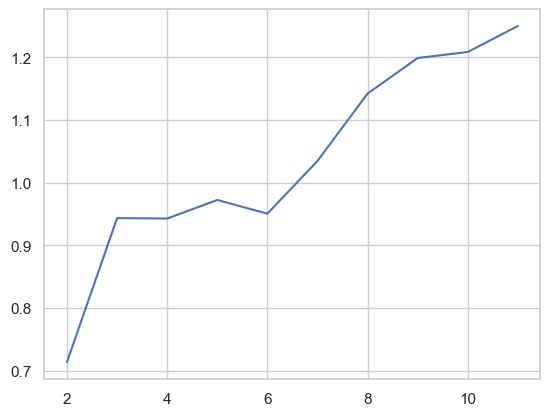

In [7]:
cgram.davies_bouldin.plot()

## Acessing labels

`Clustergram` stores resulting labels for each of the tested options, which can be accessed as:

In [8]:
cgram.labels

,1,2,3,4,5,6,7,8,9,10,11
0,0,0,1,1,4,0,3,4,7,9,4
1,0,0,1,1,4,0,3,2,7,3,4
2,0,0,1,1,4,0,3,2,8,3,0
3,0,0,1,1,4,0,3,4,6,9,0
4,0,0,1,1,1,4,5,4,6,0,8
...,...,...,...,...,...,...,...,...,...,...,...
337,0,1,2,2,0,1,6,3,0,5,3
338,0,1,2,2,0,1,6,3,0,5,3
339,0,1,2,0,2,3,0,7,3,1,5
340,0,1,2,2,0,1,4,1,5,7,1


## Saving clustergram

If you want to save your computed `clustergram.Clustergram` object to a disk, you can use `pickle` library:

In [9]:
import pickle

with open('clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)

In [10]:
with open('clustergram.pickle','rb') as f:
    loaded = pickle.load(f)